In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import json
import re

In [ ]:
d = {'asd': 25, 'sad': 25}
str(d)[1:-1]

"'asd': 25, 'sad': 25"

In [ ]:
descriptors = []
docs = ['prepared_documents_know_2.json', 'prepared_documents_can_2.json', 'prepared_documents_skill_2.json']
for doc in docs:
  with open('data/texts/' + doc) as read_file:
      descriptors.append(json.load(read_file))
for i in range(len(descriptors)):
  voc = ""
  voc_2 = ""
  with open('data/vocabulary/' + str(i) + "voc_sum_2.txt", "w") as write_file:
      write_file.write("")
  for doc in descriptors[i]:
    vectorizer = CountVectorizer()
    #vectorizer_2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
    X = vectorizer.fit_transform([doc])
    #X_2 = vectorizer_2.fit_transform([doc])
    voc = "|text " + re.sub(": ", ":", re.sub(",", "", re.sub("'", "", str(dict(zip(vectorizer.get_feature_names(), X.toarray().sum(axis=0))))[1:-1])))
    #voc_2 = "|text " + re.sub(": ", ":", re.sub(",", "", re.sub("'", "", str(dict(zip(vectorizer_2.get_feature_names(), X_2.toarray().sum(axis=0))))[1:-1])))
    with open('data/vocabulary/' + str(i) + "voc_sum_2.txt", "r") as read_file:
      voc = read_file.read() + voc + "\n"# + voc_2 + "\n"
    with open('data/vocabulary/' + str(i) + "voc_sum_2.txt", "w") as write_file:
      write_file.write(voc)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
with open('data/vocabulary/0voc_2.json') as read_file:
      print(json.load(read_file))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Step 1. Update and install dependencies
!apt-get --yes update
!apt-get --yes install git make cmake build-essential libboost-all-dev

# Step 2. Insall python packages
!apt-get --yes install python-numpy python-pandas python-scipy
!wget https://bootstrap.pypa.io/get-pip.py
!python get-pip.py
!pip install protobuf tqdm wheel

# Step 3. Clone repository and build
!git clone --branch=stable https://github.com/bigartm/bigartm.git


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:
!cd bigartm && mkdir build && cd build && cmake .. && make && make install && export ARTM_SHARED_LIBRARY=/usr/local/lib/libartm.so

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [ ]:
!cd bigartm && cd build && pip install python/bigartm*.whl

Processing ./python/bigartm-0.10.0-cp37-cp37m-linux_x86_64.whl


In [ ]:
import artm

In [ ]:
batch_vectorizer_know = artm.BatchVectorizer(data_path='data/vocabulary/0voc_sum_2.txt',# путь к "мешку слов"
                                        data_format='vowpal_wabbit',# формат данных
                                       target_folder='know', #папка с частотной матрицей из batch
                                        batch_size=28)# количество документов в одном batch
batch_vectorizer_can = artm.BatchVectorizer(data_path='data/vocabulary/1voc_sum_2.txt',# путь к "мешку слов"
                                        data_format='vowpal_wabbit',# формат данных
                                       target_folder='can', #папка с частотной матрицей из batch
                                        batch_size=40)# количество документов в одном batch
batch_vectorizer_skiil = artm.BatchVectorizer(data_path='data/vocabulary/2voc_sum_2.txt',# путь к "мешку слов"
                                        data_format='vowpal_wabbit',# формат данных
                                       target_folder='skill', #папка с частотной матрицей из batch
                                        batch_size=43)# количество документов в одном batch

In [ ]:
batch_vectorizer_know = artm.BatchVectorizer(data_path='know',data_format='batches')
dictionary = artm.Dictionary(data_path='know')# загрузка данных в словарь
model = artm.ARTM(num_topics=28,
                  num_document_passes=10,#10 проходов по документу
                  dictionary=dictionary,
                  scores=[artm.TopTokensScore(name='top_tokens_score')])
model.fit_offline(batch_vectorizer=batch_vectorizer_know, num_collection_passes=10)#10 проходов по коллекции
top_tokens = model.score_tracker['top_tokens_score']

In [ ]:
topics_know = []
for topic_name in model.topic_names:
  topic = ""
  for (token, weight) in zip(top_tokens.last_tokens[topic_name], top_tokens.last_weights[topic_name]):    
        topic += token + '-' + str(round(weight,3)) + " "
  topics_know.append(topic)

In [ ]:
batch_vectorizer_can = artm.BatchVectorizer(data_path='can',data_format='batches')
dictionary = artm.Dictionary(data_path='can')# загрузка данных в словарь
model = artm.ARTM(num_topics=40,
                  num_document_passes=10,#10 проходов по документу
                  dictionary=dictionary,
                  scores=[artm.TopTokensScore(name='top_tokens_score')])
model.fit_offline(batch_vectorizer=batch_vectorizer_can, num_collection_passes=10)#10 проходов по коллекции
top_tokens = model.score_tracker['top_tokens_score']

In [ ]:
topics_can = []
for topic_name in model.topic_names:
  topic = ""
  for (token, weight) in zip(top_tokens.last_tokens[topic_name], top_tokens.last_weights[topic_name]):    
        topic += token + '-' + str(round(weight,3)) + " "
  topics_can.append(topic)

In [ ]:
batch_vectorizer_skill = artm.BatchVectorizer(data_path='skill',data_format='batches')
dictionary = artm.Dictionary(data_path='skill')# загрузка данных в словарь
model = artm.ARTM(num_topics=43,
                  num_document_passes=10,#10 проходов по документу
                  dictionary=dictionary,
                  scores=[artm.TopTokensScore(name='top_tokens_score')])
model.fit_offline(batch_vectorizer=batch_vectorizer_skill, num_collection_passes=10)#10 проходов по коллекции
top_tokens = model.score_tracker['top_tokens_score']

In [ ]:
topics_skill = []
for topic_name in model.topic_names:
  topic = ""
  for (token, weight) in zip(top_tokens.last_tokens[topic_name], top_tokens.last_weights[topic_name]):    
        topic += token + '-' + str(round(weight,3)) + " "
  topics_skill.append(topic)

In [ ]:
print(topics_know)
print(topics_can)
print(topics_skill)

['обучение-0.05 учитель-0.03 данные-0.025 модель-0.023 машинный-0.02 число-0.017 параметрический-0.015 алгоритм-0.013 группа-0.012 это-0.011 ', 'слово-0.031 модель-0.013 это-0.012 который-0.011 вектор-0.011 текст-0.01 представление-0.009 word-0.007 vec-0.007 язык-0.006 ', 'слово-0.029 вектор-0.022 предложение-0.017 layer-0.017 векторный-0.016 сеть-0.016 матрица-0.016 представление-0.015 delta-0.011 нейронный-0.011 ', 'in-0.025 vol-0.021 networks-0.017 neural-0.016 который-0.014 arxiv-0.013 of-0.013 learning-0.011 et-0.01 for-0.01 ', 'это-0.012 слой-0.011 сеть-0.01 нормализация-0.009 обучение-0.008 который-0.008 функция-0.008 параметр-0.007 градиент-0.007 батч-0.006 ', 'сеть-0.014 функция-0.012 нейрон-0.011 это-0.011 перцептрон-0.01 который-0.009 нейронный-0.009 обучение-0.008 активация-0.007 relu-0.007 ', 'обучение-0.028 глубокий-0.027 это-0.021 шаг-0.018 который-0.014 хороший-0.011 статья-0.011 изучать-0.01 мочь-0.009 начинать-0.009 ', 'функция-0.029 layer-0.021 acc-0.018 слой-0.016 а

In [ ]:
with open('data/topics/topics_2.txt', 'w') as write_file:
  write_file.write(str(([topics_know, topics_can, topics_skill])))

Нейронка BERTopic

In [60]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 25.3 MB 2.6 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
     |████████████████████████████████| 3.4 MB 41.9 MB/s 
     |████████████████████████████████| 3.3 MB 35.7 MB/s 
     |████████████████████████████████| 1.2 MB 39.4 MB/s 
     |████████████████████████████████| 61 kB 390 kB/s 
     |████████████████████████████████| 895 kB 52.4 MB/s 
     |████████████████████████████████| 636 kB 44.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=d4f7f80cb684c3c7a33ffcb49771071c08c7b61d64f61a2156893cbdfa833dd3
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: numpy
    Found existing installati

In [1]:
from bertopic import BERTopic

In [2]:
import json

In [3]:
docs_know = []
docs_can = []
docs_skill = []
with open('data/texts/prepared_documents_know_2.json', 'r') as read_file:
  docs_know = json.load(read_file)
with open('data/texts/prepared_documents_can_2.json', 'r') as read_file:
  docs_can = json.load(read_file)
with open('data/texts/prepared_documents_skill_2.json', 'r') as read_file:
  docs_skill = json.load(read_file)

In [4]:
print(len(docs_know))

28


In [5]:
topics_neural = []

In [6]:
from hdbscan import HDBSCAN

In [97]:
hdbscan_model = HDBSCAN(metric='euclidean', cluster_selection_method='eom', prediction_data=True, leaf_size=7)

In [98]:
topic_model_know = BERTopic(language="multilingual", 
                            top_n_words=20, 
                            n_gram_range=(1, 2), nr_topics=10,
                            hdbscan_model=hdbscan_model, calculate_probabilities=True, verbose=True)

In [102]:
topics, probs = topic_model_know.fit_transform(docs_know)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2021-12-20 04:54:59,934 - BERTopic - Transformed documents to Embeddings
2021-12-20 04:55:03,350 - BERTopic - Reduced dimensionality with UMAP
2021-12-20 04:55:03,367 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-12-20 04:55:05,313 - BERTopic - Reduced number of topics from 3 to 3


In [103]:
topic_model_know.get_topic_info()

,Topic,Count,Name
0,-1,14,-1_сеть_это_слово_который
1,1,9,1_сеть_это_который_функция
2,0,5,0_обучение_глубокий_сеть_глубокий обучение


In [11]:
topic_model_know.get_topics()

{-1: [('слово', 0.029219813483248817),
  ('сеть', 0.027360687944156917),
  ('это', 0.020593134043343102),
  ('layer', 0.019755472221877166),
  ('нейронный', 0.018173278922303703),
  ('нейронный сеть', 0.01730257291995605),
  ('self', 0.016953756857216958),
  ('который', 0.01644378839904544),
  ('обучение', 0.016036447803478463),
  ('test', 0.014876658323800274),
  ('np', 0.014427973244519257),
  ('вектор', 0.014148661082742126),
  ('acc', 0.013908775575624734),
  ('глава', 0.013743403892404912),
  ('слой', 0.013406737282402022),
  ('delta', 0.01265306771411623),
  ('представление', 0.012612948367650385),
  ('train', 0.0125773232079149),
  ('мочь', 0.012127271692167688),
  ('функция', 0.011854866697977178)],
 0: [('обучение', 0.052660923152255595),
  ('глубокий обучение', 0.02650955833085312),
  ('глубокий', 0.025698693421402054),
  ('это', 0.024753754990911567),
  ('который', 0.022684265829693254),
  ('игра', 0.01727936510331396),
  ('подкрепление', 0.017051618339301855),
  ('обучение 

In [42]:
topic_model_know.visualize_barchart()

In [ ]:
topic_model_know.visualize_topics()

In [17]:
topics_neural.append(topic_model_know.get_topics())

In [ ]:
vectorizer = CountVectorizer(min_df=24)
X = vectorizer.fit_transform(docs_know)
repeated_words = vectorizer.get_feature_names()

In [ ]:
docs_know_2 = docs_know.copy()
for i in range(len(docs_know_2)):
  for word in repeated_words:
    docs_know_2[i] = docs_know_2[i].replace(word, "")

In [ ]:
docs_know

In [ ]:
topic_model_know_2 = BERTopic(language="multilingual", top_n_words=10, verbose=True)
topics, probs = topic_model_know_2.fit_transform(docs_know_2)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2021-12-19 09:31:26,814 - BERTopic - Transformed documents to Embeddings
2021-12-19 09:31:30,510 - BERTopic - Reduced dimensionality with UMAP
2021-12-19 09:31:30,523 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
topic_model_know_2.get_topic_info()

,Topic,Count,Name
0,-1,28,-1_ся_модель_слой_слово


In [ ]:
topic_model_know_2.get_topics()

{-1: [('ся', 0.04051206053729555),
  ('модель', 0.031682638256352),
  ('слой', 0.031523006557830115),
  ('слово', 0.03078555247536529),
  ('вектор', 0.02354167334341131),
  ('in', 0.023123918185483563),
  ('ной', 0.021928962562510337),
  ('матрица', 0.020103098675581466),
  ('input', 0.01992179609006094),
  ('layer', 0.019302134192302)]}

In [20]:
topic_model_can = BERTopic(language="multilingual", 
                            top_n_words=20, 
                            n_gram_range=(1, 2), nr_topics=10, hdbscan_model=hdbscan_model, calculate_probabilities=True, verbose=True)
topics, probs = topic_model_can.fit_transform(docs_can)

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2021-12-20 04:33:48,166 - BERTopic - Transformed documents to Embeddings
2021-12-20 04:33:51,846 - BERTopic - Reduced dimensionality with UMAP
2021-12-20 04:33:51,869 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-12-20 04:33:54,946 - BERTopic - Reduced number of topics from 4 to 4


In [21]:
topic_model_can.get_topic_info()

,Topic,Count,Name
0,0,12,0_обучение_данные_модель_набор
1,-1,11,-1_сеть_обучение_который_данные
2,1,11,1_обучение_слой_сеть_модель
3,2,6,2_tf_tensorflow_устройство_обучение


In [22]:
topic_model_can.get_topics()

{-1: [('сеть', 0.026526329697997713),
  ('обучение', 0.025457723573441414),
  ('который', 0.018590231543465483),
  ('данные', 0.017710971788728033),
  ('слой', 0.017593612616676406),
  ('tf', 0.01591496237944253),
  ('мочь', 0.015850752705012613),
  ('модель', 0.014525136523572053),
  ('нейронный', 0.0140303256482714),
  ('это', 0.013488298139838303),
  ('нейронный сеть', 0.013336920046323947),
  ('каждый', 0.013237033630395198),
  ('обучать', 0.013076132509463902),
  ('функция', 0.012387336663664952),
  ('глубокий', 0.011913677164308021),
  ('глава', 0.011908262186337929),
  ('рис', 0.011510992029631186),
  ('тензор', 0.011086585298578524),
  ('вектор', 0.009802731392795791),
  ('глубокий обучение', 0.009782015216470215)],
 0: [('обучение', 0.02209138110665912),
  ('данные', 0.021007139579514226),
  ('модель', 0.020197849183308487),
  ('набор', 0.018771484686370715),
  ('который', 0.016261274452210265),
  ('мочь', 0.015129515799510948),
  ('обучать', 0.014689380545588241),
  ('рис', 0

In [24]:
topic_model_can.visualize_topics()

In [25]:
topic_model_can.visualize_barchart()

In [26]:
topics_neural.append(topic_model_can.get_topics())

In [32]:
topic_model_skill = BERTopic(language="multilingual", 
                            top_n_words=20, 
                            n_gram_range=(1, 3), nr_topics=10, hdbscan_model=hdbscan_model, calculate_probabilities=True, verbose=True)
topics, probs = topic_model_skill.fit_transform(docs_skill)

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2021-12-20 04:37:14,538 - BERTopic - Transformed documents to Embeddings
2021-12-20 04:37:18,836 - BERTopic - Reduced dimensionality with UMAP
2021-12-20 04:37:18,855 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-12-20 04:37:24,266 - BERTopic - Reduced number of topics from 3 to 3


In [33]:
topic_model_skill.get_topic_info()

,Topic,Count,Name
0,0,21,0_сеть_and_слой_обучение
1,1,21,1_обучение_модель_который_функция
2,-1,1,-1_spark_version_hadoop_кластер


In [34]:
topic_model_skill.get_topics()

{-1: [('spark', 0.09281317884307383),
  ('version', 0.03924584440650163),
  ('hadoop', 0.02596344445591623),
  ('кластер', 0.02350848087043969),
  ('yarn', 0.023070190000033998),
  ('dl', 0.02115794961651532),
  ('new', 0.02023158578522374),
  ('исполнитель', 0.01882423613190443),
  ('dependency', 0.016750902038089814),
  ('groupid', 0.016716204557199226),
  ('обучение', 0.016711438717485583),
  ('artifactid', 0.01668210036009378),
  ('файл', 0.016616921509260103),
  ('задача', 0.016170807109073936),
  ('build', 0.013546448482410616),
  ('mesos', 0.013131026170177617),
  ('пример', 0.01299398149150139),
  ('платформа', 0.012870380869264062),
  ('apache', 0.01238986042582102),
  ('builder', 0.01237672615204606)],
 0: [('сеть', 0.024930961736059236),
  ('and', 0.01985846595914557),
  ('слой', 0.017142799982993482),
  ('обучение', 0.015540415364740622),
  ('функция', 0.012471978803056722),
  ('in', 0.011979646041339255),
  ('данные', 0.010681815427340941),
  ('of', 0.00968412903445264),
 

In [ ]:
topic_model_skill.visualize_topics()

In [31]:
topic_model_skill.visualize_barchart()

In [ ]:
topics_neural.append(topic_model_skill.get_topics())

In [ ]:
with open('data/topics/topics_neural_2.txt', 'w') as write_file:
  write_file.write(str(topics_neural))

In [107]:
docs_all = docs_know + docs_can + docs_skill

In [118]:
topic_model_all = BERTopic(language="multilingual", 
                            top_n_words=20, 
                            n_gram_range=(1, 3), nr_topics=10, hdbscan_model=hdbscan_model, calculate_probabilities=True, verbose=True)
topics, probs = topic_model_all.fit_transform(docs_all)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2021-12-20 05:09:31,528 - BERTopic - Transformed documents to Embeddings
2021-12-20 05:09:35,864 - BERTopic - Reduced dimensionality with UMAP
2021-12-20 05:09:35,893 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-12-20 05:09:53,415 - BERTopic - Reduced number of topics from 5 to 5


In [123]:
topic_model_all.get_topic_info()

,Topic,Count,Name
0,-1,48,-1_сеть_обучение_модель_который
1,3,19,3_обучение_модель_данные_набор
2,1,18,1_обучение_and_сеть_глубокий
3,2,14,2_сеть_это_функция_нейронный
4,0,12,0_обучение_модель_tf_tensorflow


In [120]:
topic_model_all.visualize_topics()

In [124]:
topic_model_all.visualize_barchart()

In [121]:
topic_model_skill.get_topic_info()

,Topic,Count,Name
0,-1,38,-1_обучение_сеть_модель_который
1,2,21,2_обучение_модель_который_данные
2,4,20,4_сеть_это_слой_нейронный
3,0,14,0_tf_сеть_обучение_модель
4,1,11,1_обучение_глубокий_сеть_глубокий обучение
5,3,7,3_слой_сеть_сверточный_нейрон


In [125]:
topic_model_skill.visualize_barchart()

In [122]:
topic_model_skill.visualize_topics()

Визуализация

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 38.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=13b457fae037ae96c30d99f938bfec52e9579d3e87146a64528cf87f14bf774e
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=18aef8db3686592edd302b9f599020e4f975a0fc9fe11ee2db3cd90dc84b0801
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311885 sha256=5b34aed30272ade4d70bd12f46f6644459532a2ebf620c9b966adf9aea7e0c64
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [127]:
import umap
import hdbscan
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


In [128]:
topics = [['обучение-0.05 учитель-0.03 данные-0.025 модель-0.023 машинный-0.02 число-0.017 параметрический-0.015 алгоритм-0.013 группа-0.012 это-0.011 ', 'слово-0.031 модель-0.013 это-0.012 который-0.011 вектор-0.011 текст-0.01 представление-0.009 word-0.007 vec-0.007 язык-0.006 ', 'слово-0.029 вектор-0.022 предложение-0.017 layer-0.017 векторный-0.016 сеть-0.016 матрица-0.016 представление-0.015 delta-0.011 нейронный-0.011 ', 'in-0.025 vol-0.021 networks-0.017 neural-0.016 который-0.014 arxiv-0.013 of-0.013 learning-0.011 et-0.01 for-0.01 ', 'это-0.012 слой-0.011 сеть-0.01 нормализация-0.009 обучение-0.008 который-0.008 функция-0.008 параметр-0.007 градиент-0.007 батч-0.006 ', 'сеть-0.014 функция-0.012 нейрон-0.011 это-0.011 перцептрон-0.01 который-0.009 нейронный-0.009 обучение-0.008 активация-0.007 relu-0.007 ', 'обучение-0.028 глубокий-0.027 это-0.021 шаг-0.018 который-0.014 хороший-0.011 статья-0.011 изучать-0.01 мочь-0.009 начинать-0.009 ', 'функция-0.029 layer-0.021 acc-0.018 слой-0.016 активация-0.014 test-0.014 значение-0.013 train-0.01 сеть-0.01 np-0.009 ', 'слово-0.028 сеть-0.021 нейронный-0.013 данные-0.011 слой-0.01 word-0.009 weights-0.008 язык-0.008 обзор-0.008 иметь-0.008 ', 'test-0.061 train-0.054 err-0.054 acc-0.053 layer-0.026 сеть-0.022 нейронный-0.014 np-0.011 это-0.01 обучение-0.01 ', 'обучение-0.033 сеть-0.019 глубокий-0.018 книга-0.016 нейронный-0.016 глава-0.012 язык-0.007 код-0.007 издательство-0.006 несколько-0.006 ', 'сеть-0.026 вес-0.019 нейронный-0.016 layer-0.015 это-0.014 ауег-0.013 данные-0.012 узел-0.012 корреляция-0.012 матрица-0.01 ', 'сеть-0.014 это-0.011 обучение-0.011 который-0.01 мозг-0.009 нейронный-0.008 мочь-0.008 задача-0.007 год-0.007 человек-0.007 ', 'обучение-0.027 model-0.018 глубокий-0.017 test-0.011 data-0.011 данные-0.011 train-0.01 модель-0.008 глава-0.007 target-0.007 ', 'сеть-0.02 lstm-0.017 рекуррентный-0.014 это-0.012 вход-0.01 который-0.009 текст-0.008 ячейка-0.007 гейт-0.007 нейронный-0.007 ', 'сеть-0.043 обучение-0.03 каждый-0.024 значение-0.021 это-0.017 который-0.015 функция-0.013 работа-0.013 слой-0.012 модель-0.012 ', 'ошибка-0.037 weight-0.026 pred-0.022 error-0.021 вес-0.019 это-0.019 обучение-0.016 input-0.015 значение-0.013 изменение-0.013 ', 'сеть-0.062 test-0.038 слой-0.037 np-0.03 это-0.022 in-0.022 весь-0.02 случай-0.016 мочь-0.015 ауег-0.014 ', 'сеть-0.034 который-0.015 дискриминатор-0.012 внимание-0.012 мочь-0.01 обучение-0.009 часть-0.007 архитектура-0.007 например-0.006 глава-0.006 ', 'self-0.039 data-0.015 tensor-0.014 autograd-0.012 hidden-0.012 loss-0.012 np-0.011 распространение-0.011 input-0.01 обратный-0.009 ', 'of-0.015 arxiv-0.015 al-0.014 and-0.014 http-0.012 et-0.011 распределение-0.01 the-0.009 org-0.009 abs-0.009 ', 'слой-0.035 сеть-0.027 матрица-0.024 нейронный-0.022 корреляция-0.019 вектор-0.016 это-0.011 архитектура-0.01 весь-0.01 ауег-0.009 ', 'модель-0.018 порождать-0.015 распределение-0.014 который-0.012 это-0.011 tf-0.01 генератор-0.01 gan-0.008 архитектура-0.008 функция-0.007 ', 'функция-0.016 это-0.014 который-0.012 распределение-0.008 вероятность-0.008 обучение-0.007 задача-0.006 весь-0.006 ошибка-0.006 tensorflow-0.005 ', 'input-0.022 сеть-0.019 прогноз-0.019 weights-0.017 pred-0.017 вход-0.016 несколько-0.014 нейронный-0.013 вес-0.013 delta-0.012 ', 'это-0.04 сеть-0.032 модель-0.03 который-0.024 весь-0.024 функция-0.022 глава-0.013 год-0.012 однако-0.008 каждый-0.007 ', 'сеть-0.017 слой-0.014 сверточный-0.013 это-0.011 который-0.01 tf-0.009 сверток-0.008 изображение-0.007 автокодировщик-0.006 вход-0.006 ', 'обучение-0.017 это-0.013 который-0.012 игра-0.01 подкрепление-0.009 состояние-0.008 стратегия-0.007 функция-0.007 го-0.007 сеть-0.006 '], ['обучение-0.026 данные-0.023 train-0.022 val-0.019 data-0.017 пример-0.013 test-0.013 num-0.011 модель-0.009 model-0.009 ', 'изображение-0.021 скрытый-0.014 сгенерировать-0.01 сеть-0.01 модель-0.009 данные-0.009 the-0.009 пространство-0.008 np-0.008 символ-0.008 ', 'обучение-0.021 сеть-0.018 слой-0.017 tf-0.012 функция-0.011 нейронный-0.011 мочь-0.01 обучать-0.009 глубокий-0.008 модель-0.008 ', 'of-0.021 https-0.015 the-0.015 arxiv-0.014 vol-0.014 www-0.013 al-0.013 et-0.013 and-0.012 org-0.012 ', 'tf-0.04 tensorflow-0.021 который-0.012 модель-0.011 variable-0.01 name-0.01 переменный-0.01 обучение-0.01 операция-0.009 output-0.008 ', 'изображение-0.024 loss-0.013 сеть-0.012 img-0.012 потеря-0.012 the-0.01 который-0.009 генеративный-0.009 обучение-0.009 пространство-0.007 ', 'линейный-0.027 данные-0.02 обучение-0.017 уравнение-0.016 мочь-0.016 образец-0.015 функция-0.014 вектор-0.014 регрессия-0.014 признак-0.013 ', 'сеть-0.034 слой-0.019 потеря-0.016 классификация-0.015 функция-0.015 данные-0.015 model-0.014 проверка-0.012 нейронный-0.011 модель-0.01 ', 'сеть-0.015 обучение-0.013 данные-0.013 последовательность-0.012 слово-0.012 слой-0.012 model-0.011 рекуррентный-0.009 модель-0.007 этап-0.007 ', 'набор-0.022 размерность-0.017 рса-0.013 данные-0.012 измерение-0.012 обучать-0.012 понижение-0.011 образец-0.01 алгоритм-0.01 рис-0.009 ', 'tf-0.021 обучение-0.012 автокодировщик-0.011 состояние-0.008 действие-0.007 сеть-0.007 глава-0.007 это-0.007 вход-0.007 слой-0.006 ', 'size-0.011 модель-0.011 self-0.011 данные-0.011 inputs-0.009 seq-0.008 последовательность-0.008 сеть-0.007 decoder-0.007 который-0.007 ', 'обучение-0.038 глубокий-0.023 данные-0.014 машинный-0.013 который-0.01 это-0.01 задача-0.009 модель-0.008 год-0.008 мочь-0.008 ', 'python-0.033 пакет-0.027 устанавливать-0.026 sudo-0.026 keras-0.025 установка-0.023 install-0.021 gpu-0.02 apt-0.017 tensorflow-0.017 ', 'действие-0.051 state-0.05 self-0.02 обучение-0.02 основа-0.015 глубокий-0.015 весь-0.014 for-0.014 это-0.012 none-0.012 ', 'self-0.04 action-0.019 обучение-0.019 агент-0.015 подкрепление-0.012 стратегия-0.011 состояние-0.009 episode-0.009 глубокий-0.009 epsilon-0.009 ', 'модель-0.03 model-0.015 обучение-0.014 keras-0.013 слой-0.013 layers-0.012 input-0.011 conv-0.007 данные-0.007 глубокий-0.006 ', 'память-0.023 вектор-0.021 ячейка-0.016 который-0.015 взвешивание-0.013 значение-0.012 запись-0.01 каждый-0.009 dnc-0.008 ntm-0.008 ', 'housing-0.016 данные-0.013 набор-0.011 обучение-0.01 мочь-0.009 атрибут-0.008 который-0.007 машинный-0.007 значение-0.007 модель-0.006 ', 'обучать-0.017 дерево-0.016 решение-0.015 набор-0.015 обучение-0.012 классификатор-0.01 образец-0.01 прогноз-0.01 принятие-0.009 класс-0.009 ', 'train-0.021 классификатор-0.018 классификация-0.013 класс-0.012 полнота-0.011 точность-0.011 набор-0.01 изображение-0.009 обучать-0.009 мочь-0.009 ', 'слой-0.04 сеть-0.021 сверточный-0.02 карта-0.014 признак-0.012 изображение-0.012 нейрон-0.011 нейронный-0.009 который-0.008 рис-0.007 ', 'изображение-0.015 сеть-0.015 сверточный-0.013 conv-0.013 обучение-0.012 признак-0.011 dir-0.01 слой-0.01 модель-0.009 данные-0.009 ', 'tf-0.026 tensorflow-0.016 relu-0.015 граф-0.012 код-0.011 name-0.01 узел-0.009 создавать-0.009 который-0.009 обучение-0.008 ', 'ошибка-0.017 спуск-0.016 градиент-0.015 обучение-0.013 минимум-0.012 градиентный-0.011 поверхность-0.011 глубокий-0.01 локальный-0.009 который-0.009 ', 'сеть-0.037 тензор-0.028 данные-0.016 форма-0.016 операция-0.015 shape-0.014 первый-0.011 градиент-0.011 нейронный-0.011 функция-0.01 ', 'обучение-0.032 модель-0.029 данные-0.028 машинный-0.012 набор-0.011 обучать-0.01 который-0.009 мочь-0.009 задача-0.008 признак-0.008 ', 'обучение-0.044 функция-0.023 каждый-0.019 мочь-0.016 глубокий-0.014 обучать-0.014 состояние-0.013 вход-0.012 tf-0.011 loss-0.01 ', 'тензор-0.033 данные-0.017 вектор-0.015 значение-0.013 потеря-0.013 каждый-0.013 пример-0.012 иметь-0.012 train-0.011 который-0.011 ', 'представление-0.021 tf-0.016 данные-0.012 векторный-0.011 обучение-0.011 который-0.01 train-0.01 слово-0.01 плотный-0.01 рис-0.009 ', 'который-0.016 автокодировщик-0.016 действие-0.016 сеть-0.015 слой-0.013 мочь-0.011 обучение-0.01 каждый-0.009 tf-0.008 награда-0.006 ', 'модель-0.027 обучение-0.018 спуск-0.014 функция-0.013 регрессия-0.012 градиентный-0.012 обучать-0.012 уравнение-0.011 издержки-0.011 минимум-0.009 ', 'обучение-0.033 глава-0.016 машинный-0.016 сеть-0.015 нейронный-0.012 tensorflow-0.01 книга-0.009 данные-0.009 использование-0.008 глубокий-0.006 ', 'сеть-0.012 обучение-0.012 который-0.008 мочь-0.008 решение-0.007 модель-0.007 слой-0.007 обучать-0.006 данные-0.006 функция-0.005 ', 'обучение-0.024 модель-0.017 глубокий-0.015 сеть-0.013 данные-0.013 это-0.012 который-0.009 слой-0.008 задача-0.008 мочь-0.007 ', 'нейрон-0.021 слой-0.019 сеть-0.017 обучение-0.01 tf-0.009 рис-0.009 функция-0.008 который-0.007 сверточный-0.007 глава-0.007 ', 'сеть-0.022 rnn-0.018 tf-0.017 ячейка-0.011 шаг-0.01 нейронный-0.009 временный-0.008 каждый-0.008 слово-0.007 слой-0.007 ', 'jupyter-0.026 экземпляр-0.024 gpu-0.022 keras-0.018 рис-0.016 глубокий-0.016 ec-0.015 notebook-0.014 локальный-0.011 aws-0.01 ', 'устройство-0.015 tf-0.014 tensorflow-0.012 очередь-0.012 операция-0.012 сеть-0.011 сервер-0.01 нейронный-0.009 гп-0.008 каждый-0.008 ', 'обучение-0.04 глубокий-0.029 сеть-0.016 книга-0.015 глава-0.013 keras-0.012 нейронный-0.01 машинный-0.009 данные-0.008 модель-0.008 '], ['файл-0.015 gpu-0.015 java-0.012 версия-0.012 dl-0.01 dll-0.009 maven-0.009 nd-0.008 выполнять-0.008 cuda-0.008 ', 'new-0.023 данные-0.016 обучение-0.011 модель-0.009 слово-0.009 сеть-0.008 activation-0.008 builder-0.008 vec-0.007 пример-0.007 ', 'сеть-0.036 обучение-0.035 метод-0.026 алгоритм-0.023 слой-0.023 градиент-0.022 модель-0.02 пример-0.015 который-0.013 работа-0.011 ', 'модель-0.017 слово-0.014 al-0.012 et-0.012 обучение-0.009 нейронный-0.008 сеть-0.007 который-0.007 каждый-0.006 это-0.006 ', 'слой-0.039 сеть-0.038 входной-0.025 нейронный-0.014 область-0.013 архитектура-0.013 сверточный-0.013 вход-0.012 фильтр-0.012 глубокий-0.011 ', 'функция-0.025 обучение-0.02 параметр-0.017 метод-0.015 активация-0.013 это-0.012 скорость-0.012 слой-0.011 класс-0.01 потеря-0.01 ', 'обучение-0.071 алгоритм-0.043 функция-0.022 softmax-0.018 общий-0.015 который-0.014 распределение-0.013 случай-0.012 задача-0.011 пример-0.011 ', 'данные-0.065 сеть-0.047 метод-0.024 функция-0.023 это-0.022 входной-0.02 данный-0.017 использоваться-0.013 мочь-0.011 архитектура-0.01 ', 'обучение-0.053 глубокий-0.042 dl-0.025 глава-0.02 spark-0.012 который-0.011 архитектура-0.011 приложение-0.011 настройка-0.01 слой-0.009 ', 'обучение-0.023 глава-0.014 глубокий-0.012 сеть-0.012 модель-0.009 распределение-0.008 матрица-0.007 алгоритм-0.007 метод-0.007 книга-0.006 ', 'ия-0.017 nd-0.015 массив-0.013 ndarray-0.012 indarray-0.009 обучение-0.009 int-0.008 метод-0.008 интеллект-0.008 строка-0.007 ', 'обучение-0.017 модель-0.013 машинный-0.013 данные-0.012 функция-0.009 вектор-0.009 вероятность-0.009 который-0.008 пример-0.007 мочь-0.007 ', 'обучение-0.028 глубокий-0.018 сеть-0.015 al-0.014 et-0.014 модель-0.01 машинный-0.009 который-0.008 мочь-0.008 нейронный-0.008 ', 'матрица-0.024 распределение-0.021 вероятность-0.021 вектор-0.015 величина-0.013 значение-0.011 функция-0.01 который-0.009 случайный-0.009 весь-0.008 ', 'сеть-0.02 рекуррентный-0.017 последовательность-0.017 рнс-0.015 шаг-0.013 блок-0.011 который-0.011 al-0.01 et-0.01 градиент-0.009 ', 'сеть-0.049 функция-0.032 обучение-0.02 нейронный-0.016 параметр-0.015 потеря-0.015 каждый-0.015 работа-0.015 обратный-0.015 значение-0.011 ', 'автокодировщик-0.026 обучение-0.013 обучать-0.013 многообразие-0.012 функция-0.011 который-0.01 распределение-0.01 кодировщик-0.009 мочь-0.009 реконструкция-0.008 ', 'spark-0.044 version-0.016 обучение-0.011 hadoop-0.01 new-0.01 dl-0.009 кластер-0.009 yarn-0.009 задача-0.009 пример-0.008 ', 'выборка-0.028 распределение-0.023 цепь-0.02 марковский-0.017 пример-0.013 модель-0.013 метод-0.012 мода-0.01 вероятность-0.01 состояние-0.01 ', 'сеть-0.029 обучение-0.017 глубокий-0.017 слой-0.014 нейронный-0.008 функция-0.007 признак-0.007 глава-0.007 это-0.007 блок-0.007 ', 'nd-0.029 версия-0.029 dl-0.028 maven-0.026 проект-0.024 version-0.022 код-0.016 git-0.015 работать-0.014 java-0.013 ', 'сеть-0.019 пример-0.018 int-0.016 каждый-0.01 new-0.01 build-0.008 глубокий-0.008 dl-0.007 list-0.007 слой-0.007 ', 'модель-0.023 распределение-0.019 сумма-0.017 выборка-0.013 статистический-0.012 обучение-0.011 метод-0.011 фаза-0.009 мочь-0.009 который-0.009 ', 'and-0.055 in-0.038 the-0.026 of-0.025 neural-0.015 on-0.015 networks-0.014 deep-0.012 for-0.011 conference-0.009 ', 'обучение-0.027 представление-0.022 учитель-0.02 который-0.013 мочь-0.01 обучать-0.009 пример-0.009 задача-0.009 модель-0.009 предобучение-0.009 ', 'функция-0.023 сеть-0.019 распространение-0.016 блок-0.014 вычисление-0.011 модель-0.011 линейный-0.01 обратный-0.009 градиент-0.009 прямой-0.008 ', 'модель-0.041 величина-0.013 распределение-0.013 граф-0.012 обучение-0.011 глубокий-0.009 мочь-0.008 переменный-0.008 который-0.008 выборка-0.007 ', 'оптимизация-0.015 обучение-0.014 градиент-0.013 функция-0.013 алгоритм-0.011 точка-0.009 спуск-0.008 скорость-0.008 мочь-0.008 метод-0.007 ', 'обучение-0.022 состояние-0.019 state-0.015 политика-0.01 значение-0.01 сеть-0.01 подкрепление-0.01 действие-0.009 rl-0.008 функция-0.008 ', 'обучение-0.021 гиперпараметр-0.018 ошибка-0.018 модель-0.014 алгоритм-0.01 значение-0.01 мочь-0.01 набор-0.009 качество-0.009 поиск-0.009 ', 'изображение-0.023 сеть-0.018 данные-0.017 признак-0.016 обучение-0.015 временный-0.015 каждый-0.014 lstm-0.012 https-0.011 шаг-0.01 ', 'сеть-0.023 обучение-0.022 метод-0.015 слой-0.015 данные-0.012 модель-0.01 глубокий-0.009 функция-0.009 настройка-0.008 моделирование-0.007 ', 'вывод-0.026 обучение-0.018 модель-0.018 распределение-0.017 это-0.012 мочь-0.011 log-0.011 который-0.011 вариационный-0.011 алгоритм-0.01 ', 'модель-0.018 обучение-0.017 регуляризация-0.015 параметр-0.012 набор-0.01 функция-0.008 сеть-0.008 который-0.008 мочь-0.008 весы-0.007 ', 'сеть-0.024 данные-0.023 datavec-0.014 пример-0.013 книга-0.011 класс-0.009 new-0.009 загрузка-0.008 обучение-0.008 файл-0.008 ', 'функция-0.028 сеть-0.025 слой-0.021 нейрон-0.019 нейронный-0.015 обучение-0.014 активация-0.013 входной-0.01 значение-0.01 связь-0.009 ', 'модель-0.02 распределение-0.015 сеть-0.014 блок-0.011 порождать-0.01 машина-0.01 больцман-0.009 слой-0.009 омб-0.008 al-0.008 ', 'сеть-0.023 сверточный-0.019 сверток-0.017 слой-0.014 ядро-0.01 каждый-0.01 изображение-0.01 функция-0.009 вход-0.009 который-0.009 ', 'and-0.064 in-0.03 learning-0.029 of-0.025 neural-0.019 for-0.016 pages-0.016 with-0.011 networks-0.011 bengio-0.01 ', 'обучение-0.024 пример-0.018 алгоритм-0.017 обучать-0.014 набор-0.013 ошибка-0.012 функция-0.011 оценка-0.011 который-0.011 данные-0.01 ', 'функция-0.031 точка-0.021 значение-0.015 метод-0.014 оптимизация-0.013 который-0.012 минимум-0.012 ограничение-0.011 это-0.011 производная-0.011 ', 'данные-0.024 слово-0.016 векторизация-0.014 значение-0.012 вектор-0.009 документ-0.008 столбец-0.008 признак-0.007 метод-0.006 это-0.006 ', 'слой-0.023 сеть-0.018 обучение-0.014 данные-0.013 размер-0.013 число-0.009 блок-0.008 выходной-0.007 настройка-0.007 случай-0.007 ']]

In [129]:
import re
topics_words = []
for desc in topics:
  desc_words = []
  for topic in desc:
    desc_words.append(re.sub('-.', '', re.sub('\d', '', topic)))
  topics_words.append(desc_words)

In [130]:
topics_words

[['обучение учитель данные модель машинный число параметрический алгоритм группа это ',
  'слово модель это который вектор текст представление word vec язык ',
  'слово вектор предложение layer векторный сеть матрица представление delta нейронный ',
  'in vol networks neural который arxiv of learning et for ',
  'это слой сеть нормализация обучение который функция параметр градиент батч ',
  'сеть функция нейрон это перцептрон который нейронный обучение активация relu ',
  'обучение глубокий это шаг который хороший статья изучать мочь начинать ',
  'функция layer acc слой активация test значение train сеть np ',
  'слово сеть нейронный данные слой word weights язык обзор иметь ',
  'test train err acc layer сеть нейронный np это обучение ',
  'обучение сеть глубокий книга нейронный глава язык код издательство несколько ',
  'сеть вес нейронный layer это ауег данные узел корреляция матрица ',
  'сеть это обучение который мозг нейронный мочь задача год человек ',
  'обучение model глубок

In [56]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(topics_words[0])
X

<28x127 sparse matrix of type '<class 'numpy.int64'>'
	with 280 stored elements in Compressed Sparse Row format>

In [57]:
cluster = hdbscan.HDBSCAN(min_cluster_size=3,
                          metric='euclidean',                      
               cluster_selection_method='eom').fit(X)

In [58]:
cluster.labels_

array([-1, -1, -1, -1,  0,  0, -1,  0, -1,  0, -1,  1,  1, -1,  1,  0, -1,
        1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  0])

In [137]:
import pandas as pd

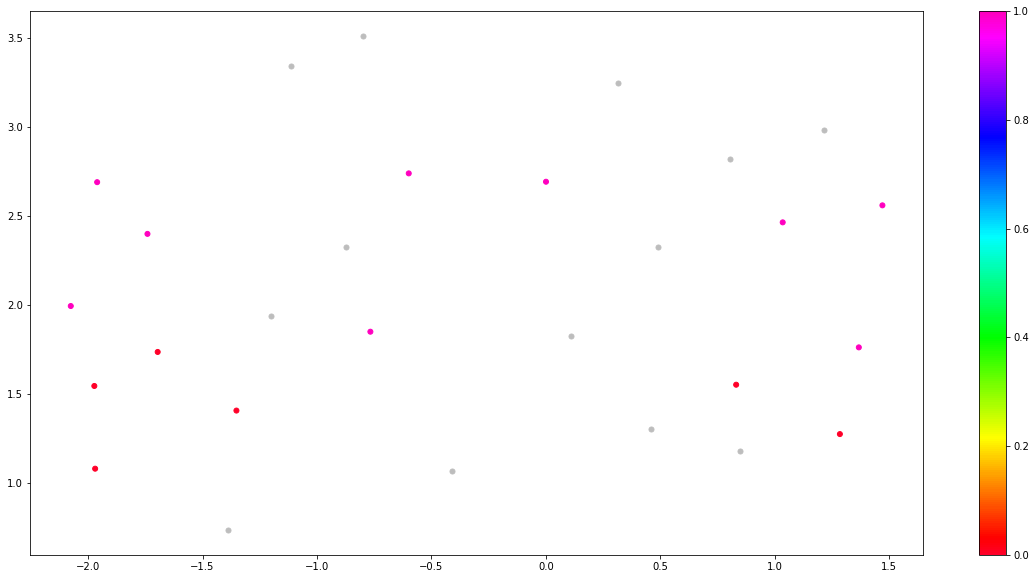

In [59]:
# Подготовка данных
umap_data = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(X)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Визуализация кластеров
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=25)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=25, cmap='gist_rainbow')
plt.colorbar()

In [52]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(topics_words[1])
X

<40x159 sparse matrix of type '<class 'numpy.int64'>'
	with 400 stored elements in Compressed Sparse Row format>

In [53]:
cluster = hdbscan.HDBSCAN(min_cluster_size=3,
                          metric='euclidean',                      
               cluster_selection_method='eom').fit(X)

In [54]:
cluster.labels_

array([-1,  1,  2, -1,  1,  1,  2,  2,  2, -1,  2,  3,  2, -1,  1, -1,  2,
       -1,  2,  1, -1,  0,  2,  0,  0,  0,  2,  3,  0,  0,  2,  3,  3,  2,
        2,  2,  3, -1,  0,  2])

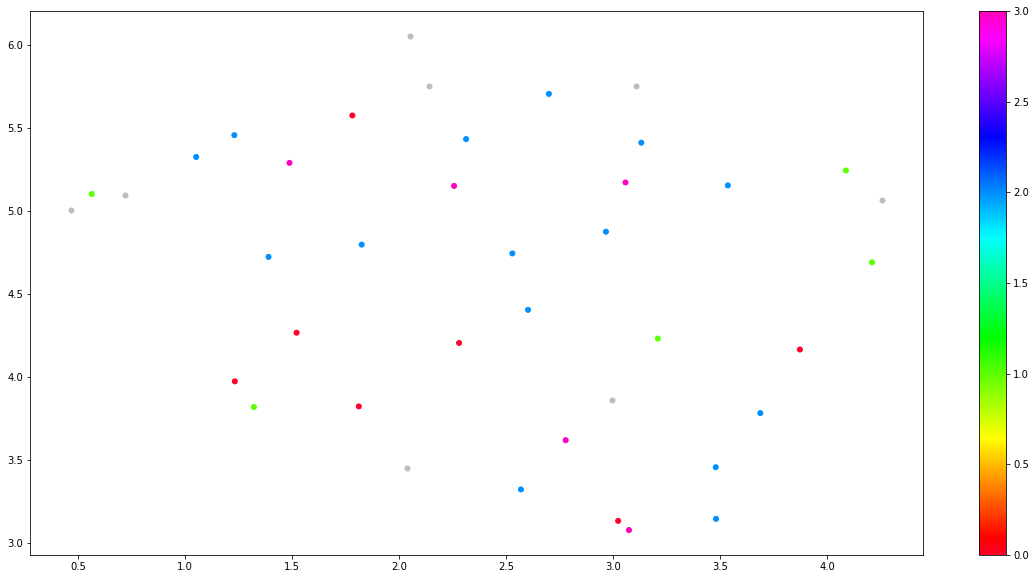

In [55]:
# Подготовка данных
umap_data = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(X)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Визуализация кластеров
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=25)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=25, cmap='gist_rainbow')
plt.colorbar()

In [39]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(topics_words[2])
X

<43x168 sparse matrix of type '<class 'numpy.int64'>'
	with 430 stored elements in Compressed Sparse Row format>

In [40]:
cluster = hdbscan.HDBSCAN(min_cluster_size=3,
                          metric='euclidean',                      
               cluster_selection_method='eom').fit(X)

In [41]:
cluster.labels_

array([-1,  1,  1,  1,  1,  1,  1,  2, -1,  1, -1,  1,  1,  2,  2,  1,  1,
        2,  2,  1, -1,  0,  1, -1,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,
        0,  1,  0,  0, -1,  1,  0, -1,  0])

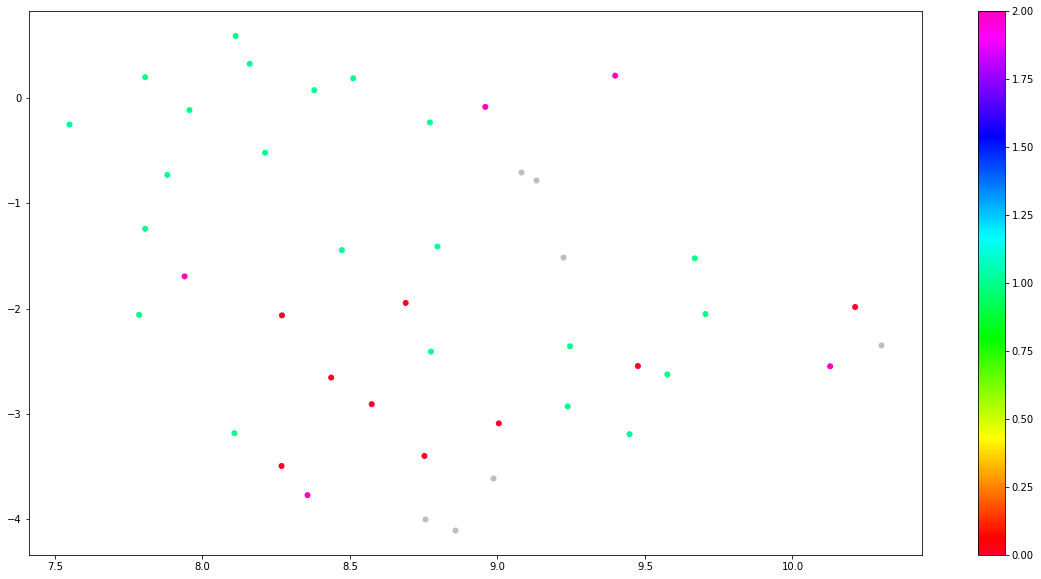

In [51]:
# Подготовка данных
umap_data = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(X)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Визуализация кластеров
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=25)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=25, cmap='gist_rainbow')
plt.colorbar()

In [132]:
topics_all = topics_words[0] + topics_words[1] + topics_words[2]

In [133]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(topics_all)
X

<111x316 sparse matrix of type '<class 'numpy.int64'>'
	with 1110 stored elements in Compressed Sparse Row format>

In [141]:
cluster = hdbscan.HDBSCAN(min_cluster_size=10,
                          metric='euclidean',                      
               cluster_selection_method='eom').fit(X)

In [142]:
cluster.labels_

array([ 0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  1, -1, -1,  1,  1,  0, -1,  0,  0,  0,  1,  1,  0, -1,  1,  1,
        1,  0,  0, -1,  0,  1,  0, -1, -1, -1,  0, -1,  0, -1, -1,  1,  0,
       -1,  1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1, -1, -1,  0,
       -1,  0,  0,  0,  1,  1,  1,  1,  1,  0, -1,  0,  0,  1, -1,  0,  0,
       -1, -1,  0, -1,  1,  0, -1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,
        1,  0,  1,  0, -1,  0,  1, -1,  1])

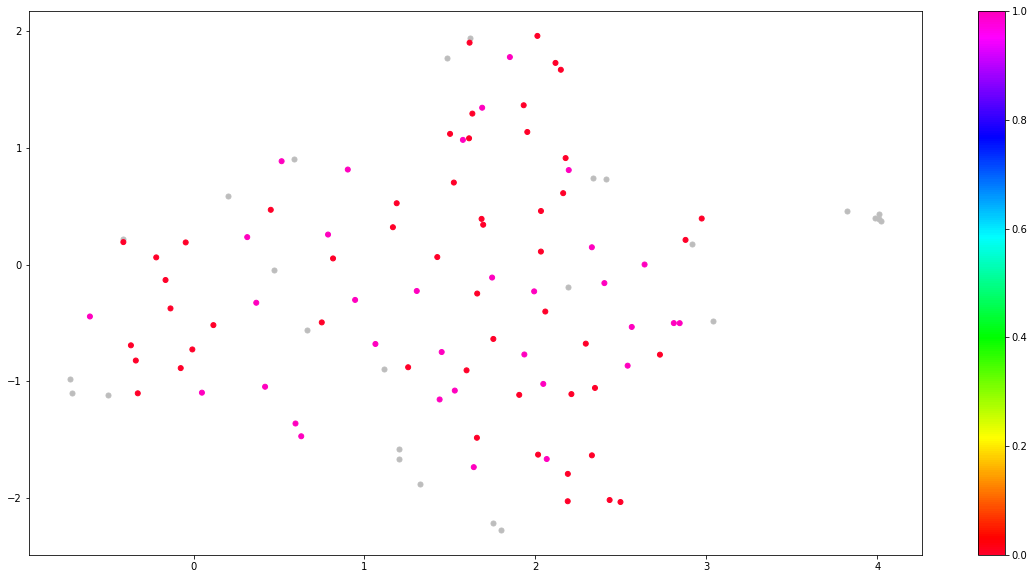

In [143]:
# Подготовка данных
umap_data = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(X)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Визуализация кластеров 10 соседей
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=25)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=25, cmap='gist_rainbow')
plt.colorbar()

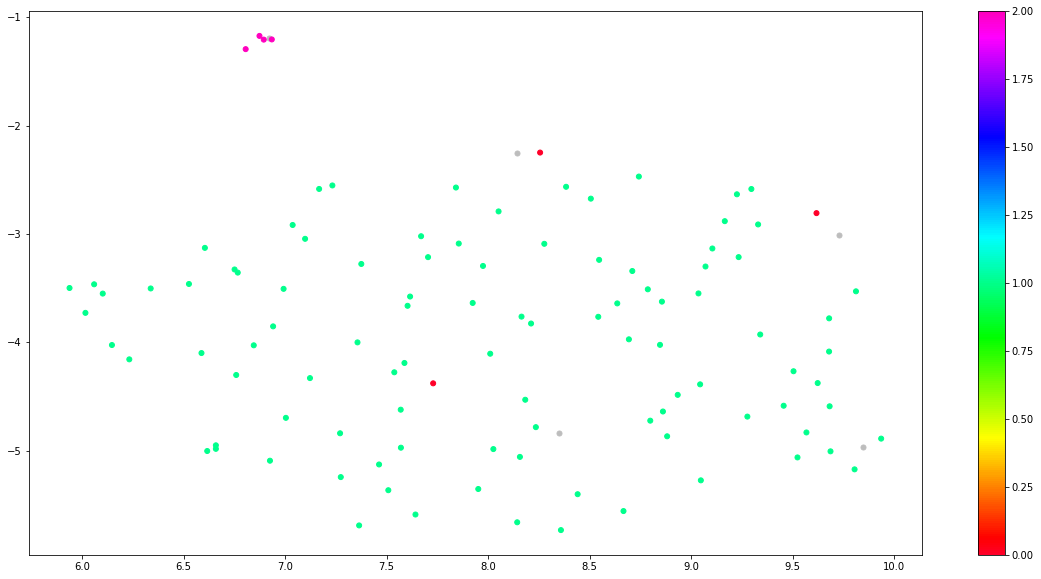

In [138]:
# Подготовка данных
umap_data = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(X)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Визуализация кластеров 3 соседа
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=25)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=25, cmap='gist_rainbow')
plt.colorbar()